### (1) 개념
- 시계열(time series) 데이터는 관측치가 시간적 순서를 가지게 된다.
- 일정 시점에 조사된 데이터는 횡단(cross-sectional)자료라 한다.
<br><br>

### (2) 분석 목적
<h5> 1. 가장 중요한 목적은 미래 값을 예측: </h5>
- trend analysis, smoothing, decomposition, ARMA model
<h5> 2. 시스템 시계열 데이터 이해와 특성 파악: </h5>
- spectrum, intervention, transfer function analysis
<h5> 3. 시계열 데이터의 특성을 파악: </h5>
- 경향(trend), 주기(cycle), 계절성(seasonality), 불규칙성(irregular) 등
<h5> 4. 데이터의 과거 흔적(정보)을 활용하여 미래 값을 예측: </h5>
- 향후 일주일간 주가 예측, 다음 달 매출액 예측 등

# 1. 시계열 데이터 가져오기
- https://financedata.github.io/posts/finance-data-reader-users-guide.html
- 주식관련 데이터 가져오기 모듈(FinanceDataReader)을 설치하고 기업(주가코드)정보를 가져오자
- FinanceData.KR에서 만든 오픈소스 금융 데이터 수집기
<br><br>

### 1) 개요
금융 데이터를 다루는데 가장 기본이 되는 데이터는 거래소별 전체 종목 코드와 가격 데이터 이다.
<br><br>

pandas-datareader 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다. (현재 버전 : pandas_datareader 0.6.0) 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다.
<br><br>

FinanceDataReader는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.
<br><br>

### 2) 종목 코드
- 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500
<br><br>

### 3) 가격 데이터
- 해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등
- 국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등
- 각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
- 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율
- 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)

In [7]:
#!pip install -U finance-datareader
import FinanceDataReader as fdr
# 한국거래소에 상장된 모든 종목 리스트 가져오기
df_krx=fdr.StockListing('KRX') 
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6681 entries, 0 to 6680
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6681 non-null   object        
 1   Market          6681 non-null   object        
 2   Name            6681 non-null   object        
 3   Sector          2429 non-null   object        
 4   Industry        2410 non-null   object        
 5   ListingDate     2429 non-null   datetime64[ns]
 6   SettleMonth     2429 non-null   object        
 7   Representative  2429 non-null   object        
 8   HomePage        2252 non-null   object        
 9   Region          2429 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 574.1+ KB


In [25]:
# find 종목코드 및 정보
# pandas.Series 문자열 메서드인 str.contains()를 사용하면 
# 지정한 문자열이 포함되어 있는지 확인가능
# df_krx[df_krx['Name'].str.contains('하이닉스', case=False)]
# 대소문자 구별하지 않으려면 위와 같이 case를 False로 설정
name=input('주식 코드 기업명:')
df_krx[df_krx['Name'].str.contains(name)]

주식 코드 기업명:하이닉스


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1812,000660,KOSPI,SK하이닉스,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매",1996-12-26,12월,이석희,http://www.skhynix.com,경기도


## 관심 기업 주가 관련 데이터 읽어 저장하기.
<br>

- 환율, 미국 다우존스지수, 비트코인 가격 등도 불러올 수 있다.
<br>

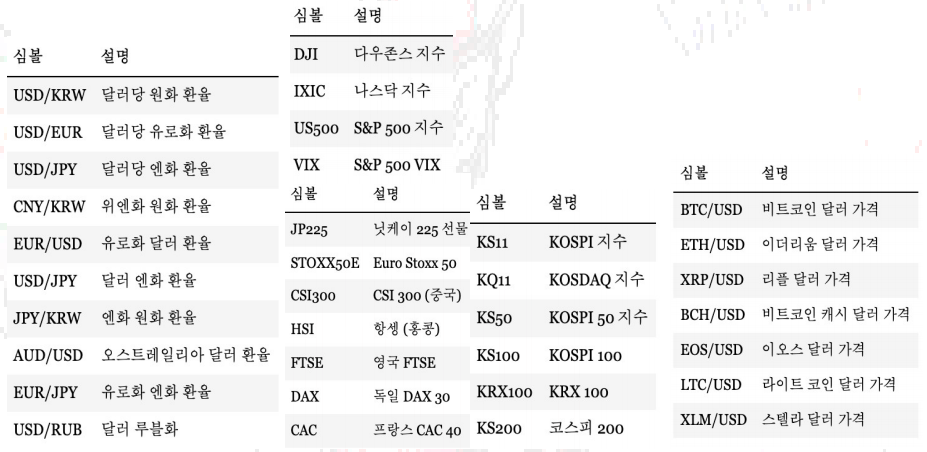
<br><br>
- 날짜를 한 번만 입력하면 `그 날부터 오늘` 현재 주가를 불러온다.
- 종가(`Close`), 시작가(`Open`), 
- 장 중 최고가(`High`), 최저가(`Low`), 
- 거래량(`Volumn`), 전일 대비 종가 기준 증감율(`Change)

In [27]:
# fdr.DataReader(symbol='KS11',start='2018-01-01',end='2018-01-01')
import FinanceDataReader as fdr
kospi = fdr.DataReader('KS11','2018-01-01') # 코스피
SE = fdr.DataReader('005930','2018-01-01') # 삼성전자
SKH = fdr.DataReader('000660','2018-01-01') # SK하이닉스
SB = fdr.DataReader('207940',end='2018-01-01') # 삼성바이오로직스

DJI = fdr.DataReader('DJI','2021-02-10') # 미국 다우존스 지수
USD_WON = fdr.DataReader('USD/KRW','2021-02-10') # 달러당 원화 환율
fdr.DataReader('BTC/KRW','2021-02-10') # 비트코인 달러 가격

kospi.head(3)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,2479.65,2474.86,2481.02,2465.94,262200000.0,0.0049
2018-01-03,2486.35,2484.63,2493.40,2481.91,331100000.0,0.0027
2018-01-04,2466.46,2502.50,2502.50,2466.45,333840000.0,-0.0080


- 2018년 1월 1일부터 불러오기를 지정했는데 1월 2일부터 시작하는 이유는 1월 1일에는 주식 장이 열리지 않았기 때문이다.
- end=옵션은 불러오는 최종 날짜를 지정한다. 만약 SB처럼 start= 를 설정하지 않으면 상장 일(삼성바이오로직스 상장일은 16년 11월 10일)부터 불러온다.

# 2. 시간도표
<br>

### 1) 정의
- 시계열 자료는 시간적 순서를 가지므로 Y축은 값, X축은 시간 순서로 하여 <br>관측값을 연결한 산점도 그래프를 시간도표(time plot)이라 한다.
- 시간적 순서를 가진 시계열 데이터 값의 시간적 변동(변화)를 보기 위한 그래프로 <br>시계열 자료의 구조(4가지 성분 파악)를 파악하는데 도움이 되며 시계열 분석의 시작이다.
<br>

### 2) 활용
- 관측값의 시간적 패턴: 시계열 성분 경향, 계절성에 대한 시각적 진단
- 주기 폭(분산)에 대한 시각적 진단: 이분산 모형 ⇔ 정상성 stationarity

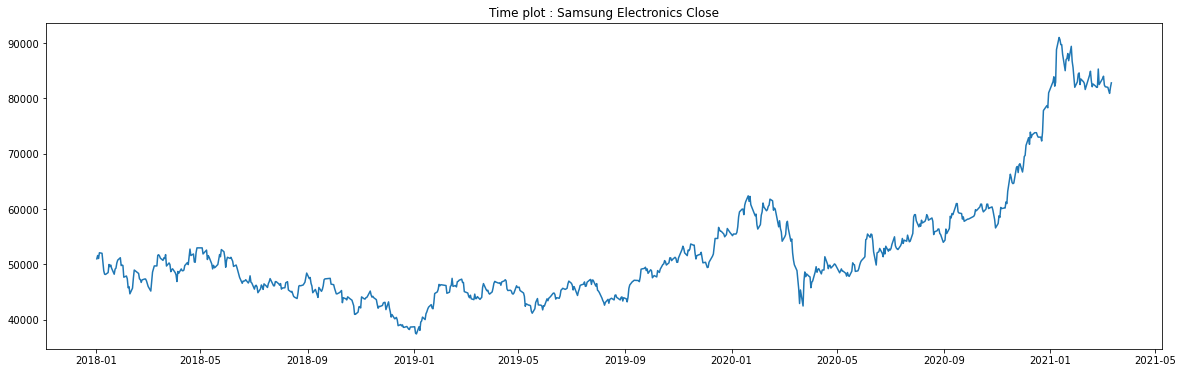

In [30]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(SE['Close'])
plt.title('Time plot : Samsung Electronics Close')
plt.show()

삼성전자 종가는 이차식(2019년 1월까지 감소하다가 이후 증가, 2020년 4월 급격한 변화)의 경향이 있고 주기의 폭(분산, 변동)은 일정해(이분산 문제 없음) 보인다.

# 3. 성분 및 모형
### (1) 시계열 성분 모형
### (2) 시계열 성분 모형

# 4. 분석 방법
### (1) 평활법: 과거 값의 평균으로 미래 값을 예측
### (2) ARIMA 모형: 시계열 데이터에 대한 모형화를 통해 미래 값을 예측
### (3) 회귀모형: 계량경제 Econometrics Model
### (4) 성분 관련 분석

# 5. 시계열 프로세스
### (1) 백색잡음
### (2) 정상 프로세스
### (3) 시계열 모형

### (3) Dickey-fuller 단일근 검정
- 귀무가설: 단일근 모형이다.  |Φ| = 1 ⇔ 모형 설정 불가, 비정상성
- 대립가설: 단일근 문제가 없다. |Φ| ≠ 1, |Φ| < 1 ⇔ 모형 설정 가능, 정상 프로세스

In [51]:
from statsmodels.tsa.stattools import adfuller
name = ['검정통계량','유의확률','사용된시차','데이터개수','유의수준별 기각값','information 값']

for i in range(len(adfuller(SE['Close']))):
    print("#{}. {}: {}".format(i+1, name[i], adfuller(SE['Close'])[i]))

#1. 검정통계량: 0.35288536908692364
#2. 유의확률: 0.979644900082938
#3. 사용된시차: 0
#4. 데이터개수: 784
#5. 유의수준별 기각값: {'1%': -3.4387184182983686, '5%': -2.865233578638179, '10%': -2.5687368149338816}
#6. information 값: 12660.168993695142


- **유의확률이 0.97(유의수준5%이상)이므로 귀무가설이 채택되어 단일근 모형으로 비정상 프로세스이다.**

### (4) Kwiatkowski-Phillips-Schmidt-Shin(KPSS) 경향 정상성 검정
- `정상성`: <br>
시계열의 확률적인 성질들이 시간의 흐름에 따라 변하지 않는다는 것을 의미한다.<br>
평균과 분산 등 체계적인 변화가 없고 주기적인 변화가 없는 것을 의미한다.<br><br>
- 귀무가설: <br>
시계열은 추세 정상성(trend stationary)을 따른다. regression='ct'<br>
직선 추세 정상성을 따르면 차분으로 정상성을 갖는다.
- 귀무가설: <br>
시계열은 상수 정상성(constant,일정한)을 따른다. regression='c'<br>
시계열은 정상 프로세스이다.<br><br>
- 대립가설: <br>
추세 정상성을 따르지 않는다.<br>
시계열은 단일근 문제를 갖는다.

In [79]:
from statsmodels.tsa.stattools import kpss

def KPSS(data,regression_option):
    A = ['검정통계량','유의확률','???','???']
    B = kpss(data, regression=str(regression_option))
    print(regression_option)
    for i in range(len(B)):
        print('#{}. {}: {}'.format(i+1,A[i],B[i])) #regression:회귀
    print('\n')

In [80]:
KPSS(SE['Close'],'ct')
KPSS(SE['Close'],'c')

ct
#1. 검정통계량: 0.5533983414649519
#2. 유의확률: 0.01
#3. ???: 21
#4. ???: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


c
#1. 검정통계량: 2.001759652746279
#2. 유의확률: 0.01
#3. ???: 21
#4. ???: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}




C:\Users\dudwl\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
C:\Users\dudwl\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


- 삼성전자 종가는 
- 추세 정상(ct, 유의확률 < 0.01)
- 상수 정상(c, 유의확률 < 0.01)
- **모두 귀무가설이 기각되어 비정상 프로세스이다.**

# 6. 정상성 만들기
분석대상 시계열데이터가 비정상인 경우 이를 해결하는 방법
### (1) 차분
### (2) 계절차분
### (3) 변수변환
변동 주기의 폭이 증가하거나 감소하는 경우 로그변환, 제곱근 변환으로 안정적 데이터를 만들 수 있음

In [84]:
SE['Close'].diff(1)

Date
2018-01-02       NaN
2018-01-03     600.0
2018-01-04    -540.0
2018-01-05    1040.0
2018-01-08    -100.0
               ...  
2021-03-08    -100.0
2021-03-09    -600.0
2021-03-10    -500.0
2021-03-11    1100.0
2021-03-12     800.0
Name: Close, Length: 785, dtype: float64